In [50]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Collecting imbalanced-learn




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\KIIT\AppData\Local\Temp\ipykernel_22920\706935119.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_percentage.index, y=win_percentage.values, palette="viridis")


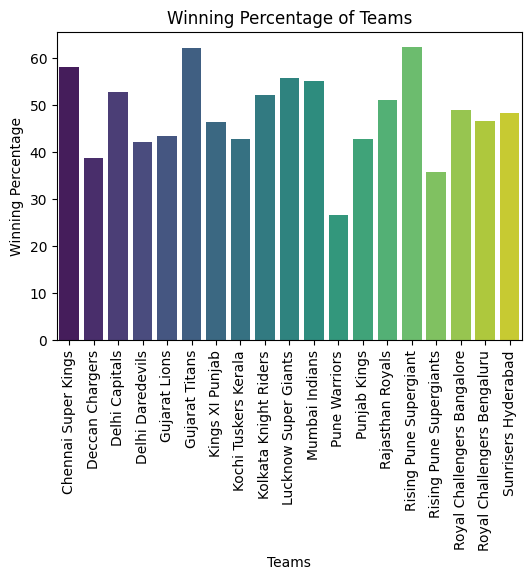

C:\Users\KIIT\AppData\Local\Temp\ipykernel_22920\706935119.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=run_rate.index, y=run_rate.values, palette="coolwarm")


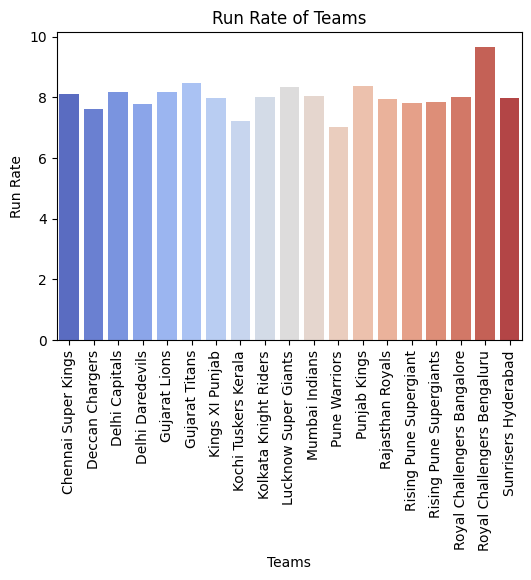

C:\Users\KIIT\AppData\Local\Temp\ipykernel_22920\706935119.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=economy_rate.index, y=economy_rate.values, palette="coolwarm")


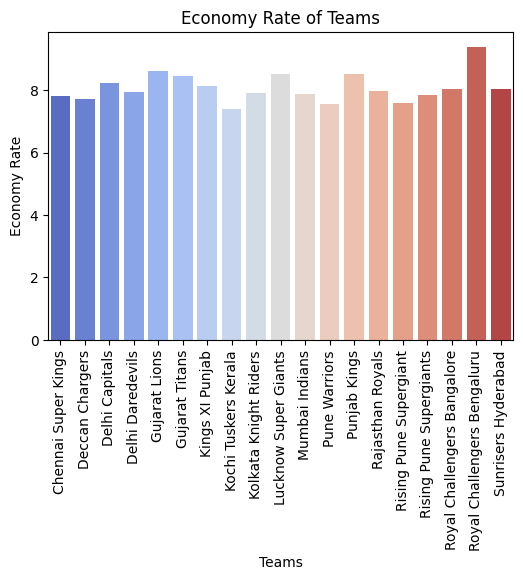

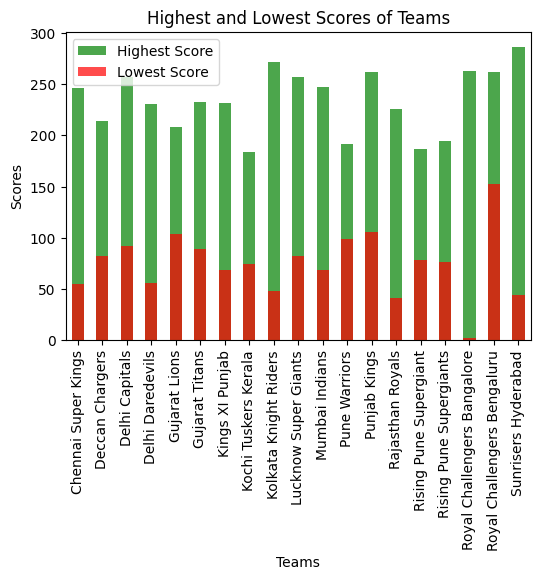

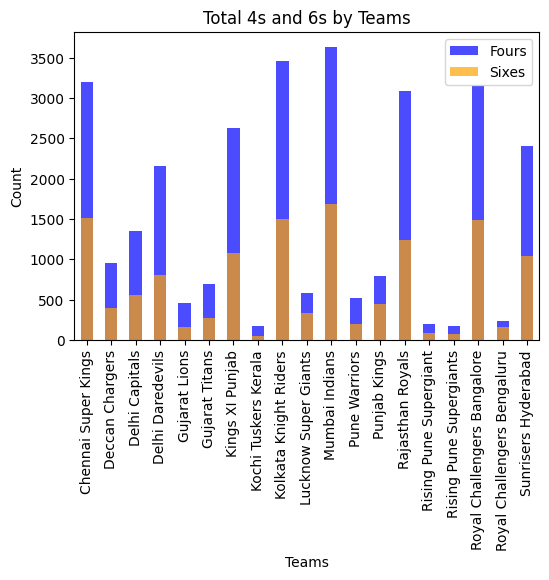

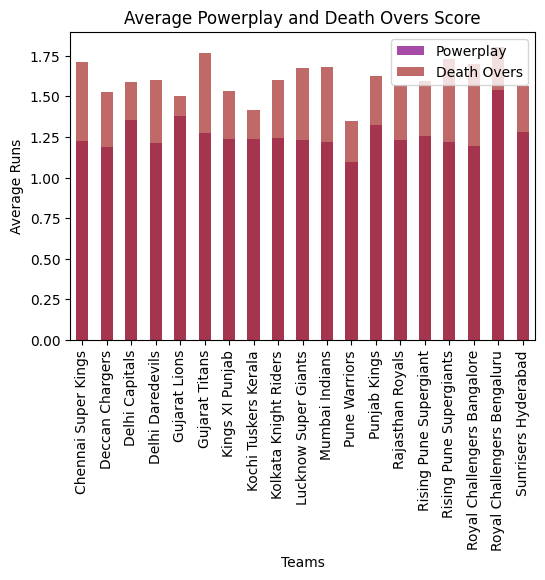


Run Per Over of Each Team:
over                               0         1         2         3         4   \
batting_team                                                                    
Chennai Super Kings          0.843098  1.077748  1.251191  1.372014  1.432580   
Deccan Chargers              1.034335  1.271222  1.217204  1.207188  1.262931   
Delhi Capitals               1.114530  1.330998  1.501779  1.398564  1.568935   
Delhi Daredevils             0.974585  1.236920  1.252747  1.315261  1.342315   
Gujarat Lions                1.077320  1.183246  1.606557  1.430851  1.451087   
Gujarat Titans               1.024911  1.369718  1.427536  1.275000  1.291228   
Kings XI Punjab              0.987654  1.115192  1.292437  1.391119  1.375850   
Kochi Tuskers Kerala         1.131868  1.078652  1.321839  1.431818  1.114943   
Kolkata Knight Riders        1.060419  1.201011  1.286901  1.361183  1.354715   
Lucknow Super Giants         0.790441  1.148551  1.375912  1.372760  1.500000   


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Data Cleaning
matches.dropna(subset=['winner'], inplace=True)  # Removing matches with no winner
matches['date'] = pd.to_datetime(matches['date'])  # Convert date column
matches['season'] = matches['date'].dt.year
deliveries = deliveries.merge(matches[['id', 'winner', 'season']], left_on='match_id', right_on='id', how='left')

# 1. Matches Played and Winning Percentages
team_matches = matches['team1'].value_counts() + matches['team2'].value_counts()
team_wins = matches['winner'].value_counts()
win_percentage = (team_wins / team_matches) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=win_percentage.index, y=win_percentage.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Winning Percentage")
plt.xlabel("Teams")
plt.title("Winning Percentage of Teams")
plt.show()

# 2. Run Rate and Economy Rate
team_runs = deliveries.groupby('batting_team')['total_runs'].sum()
team_balls = deliveries.groupby('batting_team')['ball'].count()
run_rate = (team_runs / team_balls) * 6

team_bowling_runs = deliveries.groupby('bowling_team')['total_runs'].sum()
team_bowling_balls = deliveries.groupby('bowling_team')['ball'].count()
economy_rate = (team_bowling_runs / team_bowling_balls) * 6

plt.figure(figsize=(6, 4))
sns.barplot(x=run_rate.index, y=run_rate.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.ylabel("Run Rate")
plt.xlabel("Teams")
plt.title("Run Rate of Teams")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x=economy_rate.index, y=economy_rate.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.ylabel("Economy Rate")
plt.xlabel("Teams")
plt.title("Economy Rate of Teams")
plt.show()

# 3. Highest and Lowest Scores
team_scores = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
highest_scores = team_scores.groupby('batting_team')['total_runs'].max()
lowest_scores = team_scores.groupby('batting_team')['total_runs'].min()

plt.figure(figsize=(6, 4))
highest_scores.plot(kind="bar", color='green', alpha=0.7, label="Highest Score")
lowest_scores.plot(kind="bar", color='red', alpha=0.7, label="Lowest Score")
plt.legend()
plt.xticks(rotation=90)
plt.ylabel("Scores")
plt.xlabel("Teams")
plt.title("Highest and Lowest Scores of Teams")
plt.show()

# 4. Total 4s and 6s
fours = deliveries[deliveries['batsman_runs'] == 4].groupby('batting_team')['batsman_runs'].count()
sixes = deliveries[deliveries['batsman_runs'] == 6].groupby('batting_team')['batsman_runs'].count()

plt.figure(figsize=(6, 4))
fours.plot(kind="bar", color='blue', alpha=0.7, label="Fours")
sixes.plot(kind="bar", color='orange', alpha=0.7, label="Sixes")
plt.legend()
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Teams")
plt.title("Total 4s and 6s by Teams")
plt.show()

# 5. Average Powerplay and Death Ov
powerplay_scores = deliveries[deliveries['over'] <= 6].groupby('batting_team')['total_runs'].mean()
death_overs_scores = deliveries[deliveries['over'] >= 16].groupby('batting_team')['total_runs'].mean()

plt.figure(figsize=(6, 4))
powerplay_scores.plot(kind="bar", color='purple', alpha=0.7, label="Powerplay")
death_overs_scores.plot(kind="bar", color='brown', alpha=0.7, label="Death Overs")
plt.legend()
plt.xticks(rotation=90)
plt.ylabel("Average Runs")
plt.xlabel("Teams")
plt.title("Average Powerplay and Death Overs Score")
plt.show()

# 6. Run Per Over of Each Team
run_per_over = deliveries.groupby(['batting_team', 'over'])['total_runs'].mean().unstack()

print("\nRun Per Over of Each Team:")
print(run_per_over)

# 7. Powerplay Analysis
powerplay_runs = deliveries[deliveries['over'] <= 6].groupby('batting_team')['total_runs'].sum()

print("\nPowerplay Performance of Teams:")
print(powerplay_runs)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_22920\2445949086.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_runs.head(10).index, y=player_runs.head(10).values, palette='coolwarm')


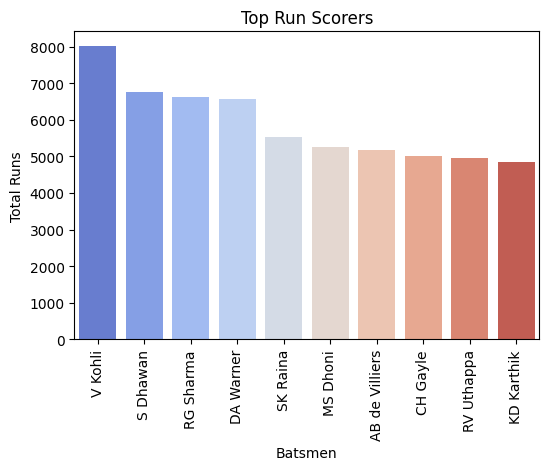

Top 20 Run Scorers:
batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
KL Rahul          4689
AM Rahane         4642
F du Plessis      4571
SV Samson         4419
AT Rayudu         4348
G Gambhir         4217
SR Watson         3880
MK Pandey         3859
SA Yadav          3594
JC Buttler        3583
Name: batsman_runs, dtype: int64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_22920\2445949086.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=batting_stats.index, y=batting_stats['Average'], palette='viridis')


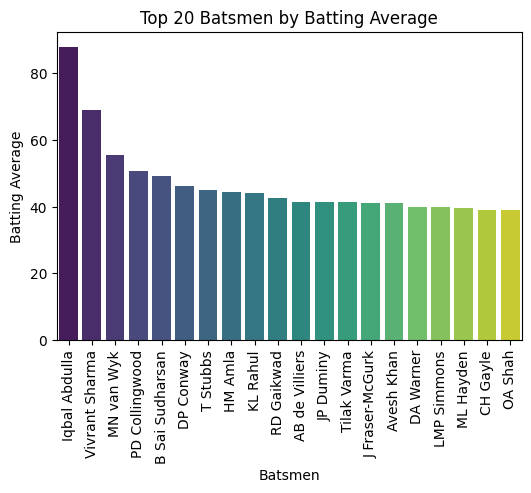

No players found with >50 matches.


C:\Users\KIIT\AppData\Local\Temp\ipykernel_22920\2445949086.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bowler_wickets.head(10).index, y=bowler_wickets.head(10).values, palette='magma')


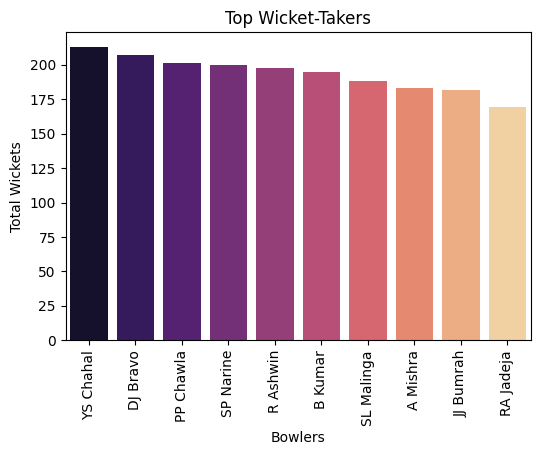

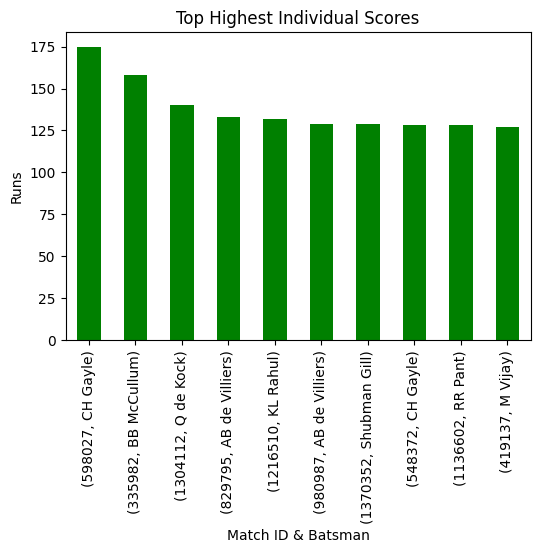

Top 10 Man of the Match Awards:
player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
Name: count, dtype: int64


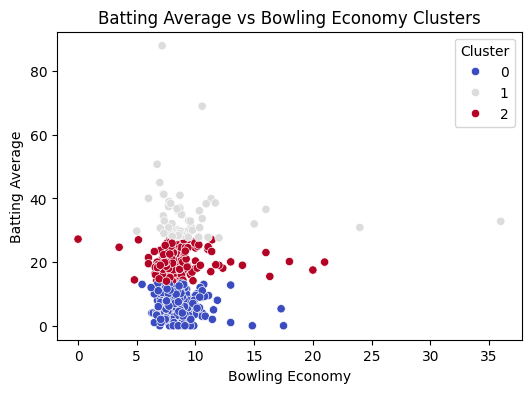

Top 10 Batsmen for 6's:
batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
dtype: int64
Top 10 Batsmen for 4's:
batter
S Dhawan        768
V Kohli         708
DA Warner       663
RG Sharma       599
SK Raina        506
G Gambhir       492
RV Uthappa      481
AM Rahane       479
KD Karthik      466
F du Plessis    422
dtype: int64
Top 10 Batsmen for 2's:
batter
V Kohli           445
DA Warner         370
MS Dhoni          340
S Dhawan          299
SK Raina          271
AB de Villiers    268
RG Sharma         263
KD Karthik        258
AM Rahane         257
G Gambhir         249
dtype: int64
Top 10 Batsmen for 1's:
batter
V Kohli       2591
S Dhawan      2102
RG Sharma     1996
SK Raina      1708
DA Warner     1682
MS Dhoni      1554
AM Rahane     1537
AT Rayudu     1495
KD Karthik    1464
KL Rahul      1464
dtype: 

In [63]:
# Player Performance Analysis

# Top Run Scorers
player_runs = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=player_runs.head(10).index, y=player_runs.head(10).values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Top Run Scorers')
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.show()
print("Top 20 Run Scorers:")
print(player_runs.head(20))

# Batting Average vs Strike Rate
# Handle NaN and Inf in Batting Average
player_dismissals = deliveries.groupby('batter')['player_dismissed'].count()
player_dismissals.replace(0, np.nan, inplace=True)  # Avoid division by zero

player_avg = player_runs / player_dismissals
player_avg.replace([np.inf, -np.inf], np.nan, inplace=True)
player_avg.dropna(inplace=True)

# Handle NaN and Inf in Strike Rate
player_strike_rate = (player_runs / player_balls) * 100
player_strike_rate.replace([np.inf, -np.inf], np.nan, inplace=True)
player_strike_rate.dropna(inplace=True)

# Create DataFrame and ensure valid data
batting_stats = pd.DataFrame({'Average': player_avg, 'Strike Rate': player_strike_rate}).dropna()

if not batting_stats.empty:
    batting_stats = batting_stats.nlargest(20, 'Average')

    # Bar Plot
    plt.figure(figsize=(6, 4))
    sns.barplot(x=batting_stats.index, y=batting_stats['Average'], palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Top 20 Batsmen by Batting Average')
    plt.xlabel('Batsmen')
    plt.ylabel('Batting Average')
    plt.show()
else:
    print("No valid data available for plotting.")


# Highest Average and Strike Rate for Players with >50 Matches
player_matches = matches.groupby('player_of_match').size()
qualified_players = batting_stats.loc[player_matches[player_matches > 50].index]
if not qualified_players.empty:
    highest_avg = qualified_players['Average'].idxmax()
    highest_sr = qualified_players['Strike Rate'].idxmax()
    print(f'Highest Batting Average (>50 matches): {highest_avg}, {qualified_players.loc[highest_avg, "Average"]}')
    print(f'Highest Strike Rate (>50 matches): {highest_sr}, {qualified_players.loc[highest_sr, "Strike Rate"]}')
else:
    print("No players found with >50 matches.")

# Top Wicket-Takers
bowler_wickets = deliveries[deliveries['player_dismissed'].notna()].groupby('bowler')['player_dismissed'].count().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=bowler_wickets.head(10).index, y=bowler_wickets.head(10).values, palette='magma')
plt.xticks(rotation=90)
plt.title('Top Wicket-Takers')
plt.xlabel('Bowlers')
plt.ylabel('Total Wickets')
plt.show()

# Highest Individual Scores
highest_scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().nlargest(10)
plt.figure(figsize=(6, 4))
highest_scores.plot(kind='bar', color='green')
plt.title('Top Highest Individual Scores')
plt.xlabel('Match ID & Batsman')
plt.ylabel('Runs')
plt.xticks(rotation=90)
plt.show()

# Man of the Match Count
mom_counts = matches['player_of_match'].value_counts()
print("Top 10 Man of the Match Awards:")
print(mom_counts.head(10))

# Batting Average vs Bowling Economy Rate Clustering
# Handle NaN and Inf in Batting Average
player_avg.replace([np.inf, -np.inf], np.nan, inplace=True)
player_avg.dropna(inplace=True)

# Handle NaN and Inf in Bowling Economy
bowler_economy.replace([np.inf, -np.inf], np.nan, inplace=True)
bowler_economy.dropna(inplace=True)

# Align indices
common_players = player_avg.index.intersection(bowler_economy.index)
cluster_data = pd.DataFrame({'Average': player_avg.reindex(common_players), 
                             'Economy': bowler_economy.reindex(common_players)}).dropna()

# Ensure enough data for clustering
if len(cluster_data) >= 3:
    kmeans = KMeans(n_clusters=3, random_state=42).fit(cluster_data)
    cluster_data['Cluster'] = kmeans.labels_

    # Plot Clusters
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=cluster_data, x='Economy', y='Average', hue='Cluster', palette='coolwarm')
    plt.title('Batting Average vs Bowling Economy Clusters')
    plt.xlabel('Bowling Economy')
    plt.ylabel('Batting Average')
    plt.show()
else:
    print("Not enough valid data for clustering.")


# Top 10 Batsmen in Different Run Categories
for run_type in [6, 4, 2, 1]:
    top_scorers = deliveries[deliveries['batsman_runs'] == run_type].groupby('batter').size().nlargest(10)
    print(f'Top 10 Batsmen for {run_type}\'s:')
    print(top_scorers)

In [64]:
# 1. Average runs per match per season
if 'total_runs' in deliveries.columns:
    season_runs = deliveries.groupby('season')['total_runs'].sum() / matches['season'].value_counts()
    print("--------------")
    print("Average Runs per Match per Season:")
    print(season_runs)
else:
    print("Column 'total_runs' not found in deliveries dataset.")

# 2. Count of 200+ run targets per season
if 'inning' in deliveries.columns and 'total_runs' in deliveries.columns:
    first_innings = deliveries[deliveries['inning'] == 1].groupby(['season', 'match_id'])['total_runs'].sum().reset_index()
    high_scores = first_innings[first_innings['total_runs'] >= 200].groupby('season').size()
    print("--------------")
    print("200+ Run Targets per Season:")
    print(high_scores)
else:
    print("Necessary columns not found in deliveries dataset.")

# 3. Average score of each team per season
if 'batting_team' in deliveries.columns and 'total_runs' in deliveries.columns:
    team_season_scores = deliveries.groupby(['season', 'batting_team'])['total_runs'].sum().reset_index()
    print("--------------")
    print("Average Score of Each Team per Season:")
    print(team_season_scores)
else:
    print("Necessary columns not found in deliveries dataset.")

# 4. Orange Cap Holders (Top Run Scorer per Season)
if 'batter' in deliveries.columns and 'batsman_runs' in deliveries.columns:
    orange_cap = deliveries.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
    orange_cap = orange_cap.loc[orange_cap.groupby('season')['batsman_runs'].idxmax()]
    print("--------------")
    print("Orange Cap Holders Per Season:")
    print(orange_cap[['season', 'batter', 'batsman_runs']])
else:
    print("Necessary columns not found in deliveries dataset.")

# 5. Purple Cap Holders (Top Wicket-Taker per Season)
if 'player_dismissed' in deliveries.columns and 'bowler' in deliveries.columns:
    purple_cap = deliveries[deliveries['player_dismissed'].notna()].groupby(['season', 'bowler'])['player_dismissed'].count().reset_index()
    purple_cap = purple_cap.loc[purple_cap.groupby('season')['player_dismissed'].idxmax()]
    print("--------------")
    print("Purple Cap Holders Per Season:")
    print(purple_cap[['season', 'bowler', 'player_dismissed']])
else:
    print("Necessary columns not found in deliveries dataset.")

# 6. Top 10 Bowlers per Season
if 'player_dismissed' in deliveries.columns and 'bowler' in deliveries.columns:
    top_bowlers = deliveries[deliveries['player_dismissed'].notna()].groupby(['season', 'bowler'])['player_dismissed'].count().reset_index()
    top_bowlers = top_bowlers.sort_values(['season', 'player_dismissed'], ascending=[True, False]).groupby('season').head(10)
    print("--------------")
    print("Top 10 Bowlers Per Season:")
    print(top_bowlers)
else:
    print("Necessary columns not found in deliveries dataset.")


--------------
Average Runs per Match per Season:
season
2008.0    309.258621
2009.0    286.894737
2010.0    314.716667
2011.0    293.027778
2012.0    303.418919
2013.0    297.394737
2014.0    315.516667
2015.0    315.157895
2016.0    314.366667
2017.0    318.406780
2018.0    331.683333
2019.0    327.644068
2020.0    323.600000
2021.0    310.616667
2022.0    329.662162
2023.0    350.178082
2024.0    365.788732
dtype: float64
--------------
200+ Run Targets per Season:
season
2008.0     7
2009.0     1
2010.0     5
2011.0     4
2012.0     4
2013.0     4
2014.0     5
2015.0     6
2016.0     5
2017.0     8
2018.0    11
2019.0     8
2020.0     9
2021.0     6
2022.0    13
2023.0    24
2024.0    26
dtype: int64
--------------
Average Score of Each Team per Season:
     season                 batting_team  total_runs
0    2008.0          Chennai Super Kings        2520
1    2008.0              Deccan Chargers        2229
2    2008.0             Delhi Daredevils        2118
3    2008.0         

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings
from xgboost import XGBClassifier

# Suppress XGBoost warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

# Define XGBoost Model (without use_label_encoder)
xgb_model = XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, eval_metric='mlogloss')


# Load datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Data Cleaning
matches.dropna(subset=['winner'], inplace=True)  # Removing matches with no winner
matches['date'] = pd.to_datetime(matches['date'])  # Convert date column
matches['season'] = matches['date'].dt.year
deliveries = deliveries.merge(matches[['id', 'winner', 'season']], left_on='match_id', right_on='id', how='left')

# Encode categorical columns
label_encoders = {}
categorical_cols = ['team1', 'team2', 'toss_winner', 'winner', 'venue', 'toss_decision']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    matches[col] = label_encoders[col].fit_transform(matches[col])

# Feature Engineering - Creating new meaningful features
matches['home_advantage'] = (matches['team1'] == matches['venue']).astype(int)
matches['toss_win_effect'] = (matches['toss_winner'] == matches['winner']).astype(int)

# Selecting relevant features
X = matches[['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'home_advantage', 'toss_win_effect']]
y = matches['winner']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
rf_model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
xgb_model = XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss')

# Define Stacking Model
stacked_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    cv=5
)

# Train Stacking Model
stacked_model.fit(X_train, y_train)

# Make Predictions
y_pred = stacked_model.predict(X_test)

# Evaluate performance
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Stacking Classifier Report:\n", classification_report(y_test, y_pred))

# Predict a match outcome
team1 = label_encoders['team1'].transform(['Chennai Super Kings'])[0]
team2 = label_encoders['team2'].transform(['Mumbai Indians'])[0]
toss_winner = team1  # Assume CSK wins the toss
toss_decision = label_encoders['toss_decision'].transform(['bat'])[0]
venue = label_encoders['venue'].transform(['Wankhede Stadium'])[0]
home_advantage = 1 if team1 == venue else 0
toss_win_effect = 1  # Assume toss winner wins more often

# Create feature array
match_features = np.array([[team1, team2, toss_winner, toss_decision, venue, home_advantage, toss_win_effect]])
match_features = scaler.transform(match_features)  # Scale the features

# Predict winner
pred_winner = stacked_model.predict(match_features)

# Decode winner
predicted_winner = label_encoders['winner'].inverse_transform(pred_winner)
print(f"Stacking Model Predicted Winner: {predicted_winner[0]}")


Stacking Classifier Accuracy: 0.8623853211009175
Stacking Classifier Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       0.80      0.67      0.73         6
           2       1.00      0.78      0.88         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         3
           5       0.56      0.83      0.67         6
           6       0.88      0.83      0.86        18
           7       0.00      0.00      0.00         1
           8       0.91      0.81      0.86        26
           9       0.67      0.80      0.73         5
          10       0.85      0.79      0.82        29
          11       0.33      0.50      0.40         2
          12       0.75      0.60      0.67         5
          13       0.91      0.91      0.91        22
          14       0.50      0.50      0.50         2
          15       0.00      0.00      0.00         1
   

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif